First Task

My first task is to simulate a random walk in n steps, with 
$$ n = 2^k $$
where k is the "size" of the simulation, or the "time" of the random walk.


--- 0.010000467300415039 seconds ---


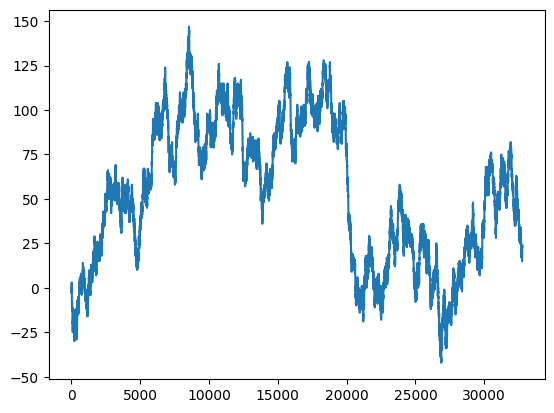

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
import numpy as np
from scipy.stats import norm
import statistics 
import time
# seed the pseudorandom number generator
from random import seed
from random import random
# seed random number generator
seed(2024)

# simulation of random walk
size = 15
start_time = time.time()
n=pow(2,size)
x = [0]*n

for i in range(1,n):
    
    if random()> 0.5:
        x[i]=x[i-1]+1
    else:
        x[i]=x[i-1]-1

print("--- %s seconds ---" % (time.time() - start_time))
plt.plot(x)
plt.show()

For the second part:
- We plan to show that the standard deviation of the random walk grows as square-root of the time;
- break time into a geometrically growing sequence: 32, 64, 128, 256... We will call each of these times a "bin";
- for each bin (say with time = t), simulate a large number of random walks with that size, only focussing on the last point (X_t);
- estimate the standard deviation of X_t for each bin;
- plot the logarithm of the standard deviation as a function of the logarithm of time (use standard variation bars);
- use a linear regression to estimate how the standard deviation grows as a function of time;
- obtain the diffusion coefficient as the slope of the line.


By central limit theorem we know that $S_n \to N(0,\sqrt{n})$, therefore $\mathbb{E}(|S_n|) \sim \mathbb{E}(|N(0,\sqrt{n})|) = \sqrt{\frac{2n}{\pi}}$.

Taking $\log$ in both sides we conclude that

$\log(\mathbb{E}|S_n|) \sim \log(\sqrt{\frac{2n}{\pi}}) $.

To plot we choose bins of size $n = 2^k$ and plot $\log(\mathbb{E}|S_n|) $ as a function of $k$, so we expect that this function be similar to a line

$\log(\mathbb{E}|S_n|)  \sim \frac{1}{2}\log(2)*k + \log(\sqrt{\frac{2}{\pi}})$.

The objective of the followings simulations is to estimate this coeficient $\frac{1}{2}$ called "difusion coeficient" numerically.

 ---- diffusion constant is approximally 0.5452252350965879 using median ----
 ---- diffusion constant is approximally 0.5046489969982966 using mean ----


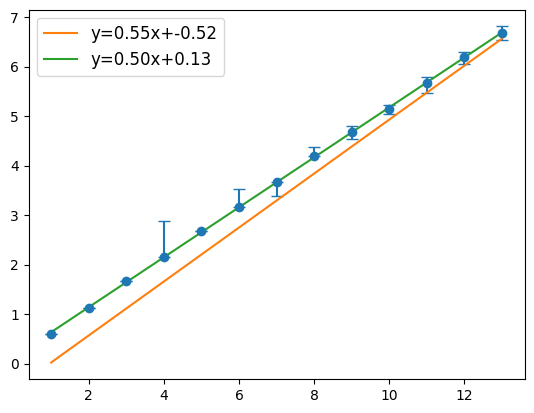

--- 9.90956711769104 seconds ---


In [4]:
start_time = time.time()

seed(-12)
size = 15
numbsimul = 1600
Size = np.linspace(1,size-2, size-2)

A = np.zeros((size - 2,numbsimul -1))

# simulations of random walks
for k in range(2,size):
    n=pow(2,k)

    for j in range(1,numbsimul):
    
        x = 0
    
        for i in range(1,n):
            
            if random()> 0.5:
                x=x+1
            else:
                x=x-1
            
        A[k-2][j-1] = x

# calculating the linear regression of log map
absA = np.abs(A)
sortedAbs = np.sort(absA)
stdA = absA.std(1)
meanA = absA.mean(1)
median = np.quantile(absA, 0.5 , 1)

logmean = np.log(meanA)/np.log(2)
logmedian = np.log(median)/np.log(2)
p1 = np.polyfit(Size, logmedian, 1)
p2 = np.polyfit(Size, logmean, 1)

# calculating the interval of confidence
alpha = 0.001 # confidence level

lowerboundindex = math.floor(0.5* numbsimul - math.sqrt(0.25*numbsimul)*norm.isf(alpha))
upperboundindex = math.floor(0.5* numbsimul + math.sqrt(0.25*numbsimul)*norm.isf(alpha))
lowerboundindex = [lowerboundindex for i in range(size-2)]
upperboundindex = [upperboundindex for i in range(size-2)]
lowerboundheight = sortedAbs[np.arange(size-2),lowerboundindex]
upperboundheight = sortedAbs[np.arange(size-2),upperboundindex]
loglower = np.log(lowerboundheight)/np.log(2)
logupper = np.log(upperboundheight)/np.log(2)

errorbar = [np.abs(loglower-logmedian), np.abs(logupper-logmedian)]

# printing everything
print(" ---- diffusion constant is approximally %s using median ----" % p1[0])
print(" ---- diffusion constant is approximally %s using mean ----" % p2[0])
# print("---- error = %s ----" % (errorbar))
plt.errorbar(Size,logmean,yerr=errorbar, linestyle = 'None',capsize=4, marker = 'o')
plt.plot(Size, p1[1]+p1[0]*Size, label='y={:.2f}x+{:.2f}'.format(p1[0],p1[1]))
plt.plot(Size, p2[1]+p2[0]*Size, label='y={:.2f}x+{:.2f}'.format(p2[0],p2[1]))
plt.legend(fontsize=12)
plt.show()
print("--- %s seconds ---" % (time.time() - start_time))


For purpose of experimentation I also tried to see what happens when simmulate only for the k above a number and also for only times (k), perhaps the better choice of two times is take powers of 2.

 ---- diffusion constant is approximally 0.5579905834505106 using median ----
 ---- diffusion constant is approximally 0.560840982710927 using mean ----


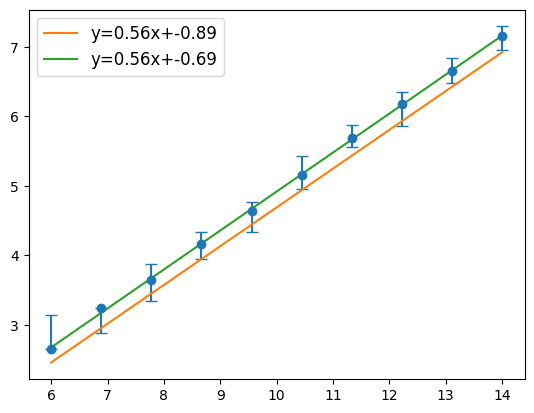

In [5]:
start_time = time.time()

seed(1)
size = 16
start = 6
numbsimul = 800
Size = np.linspace(start,size-2, size-start)

A = np.zeros((size - start,numbsimul -1))

# simulations of random walks
for k in range(start,size):
    n=pow(2,k)

    for j in range(1,numbsimul):
    
        x = 0
    
        for i in range(1,n):
            
            if random()> 0.5:
                x=x+1
            else:
                x=x-1
            
        A[k-start][j-1] = x

# calculating the linear regression of log map
absA = np.abs(A)
sortedAbs = np.sort(absA)
stdA = absA.std(1)
meanA = absA.mean(1)
median = np.quantile(absA, 0.5 , 1)

logmean = np.log(meanA)/np.log(2)
logmedian = np.log(median)/np.log(2)
p1 = np.polyfit(Size, logmedian, 1)
p2 = np.polyfit(Size, logmean, 1)

# calculating the interval of confidence
alpha = 0.001 # confidence level

lowerboundindex = math.floor(0.5* numbsimul - math.sqrt(0.25*numbsimul)*norm.isf(alpha))
upperboundindex = math.floor(0.5* numbsimul + math.sqrt(0.25*numbsimul)*norm.isf(alpha))
lowerboundindex = [lowerboundindex for i in range(size-start)]
upperboundindex = [upperboundindex for i in range(size-start)]
lowerboundheight = sortedAbs[np.arange(size-start),lowerboundindex]
upperboundheight = sortedAbs[np.arange(size-start),upperboundindex]
loglower = np.log(lowerboundheight)/np.log(2)
logupper = np.log(upperboundheight)/np.log(2)

errorbar = [np.abs(loglower-logmedian), np.abs(logupper-logmedian)]

# printing everything
print(" ---- diffusion constant is approximally %s using median ----" % p1[0])
print(" ---- diffusion constant is approximally %s using mean ----" % p2[0])
# print("---- error = %s ----" % (errorbar))
plt.errorbar(Size,logmean,yerr=errorbar, linestyle = 'None',capsize=4, marker = 'o')
plt.plot(Size, p1[1]+p1[0]*Size, label='y={:.2f}x+{:.2f}'.format(p1[0],p1[1]))
plt.plot(Size, p2[1]+p2[0]*Size, label='y={:.2f}x+{:.2f}'.format(p2[0],p2[1]))
plt.legend(fontsize=12)
plt.show()

 ---- diffusion constant is approximally 0.4905340842295941 using median ----
 ---- diffusion constant is approximally 0.4928360797586568 using mean ----


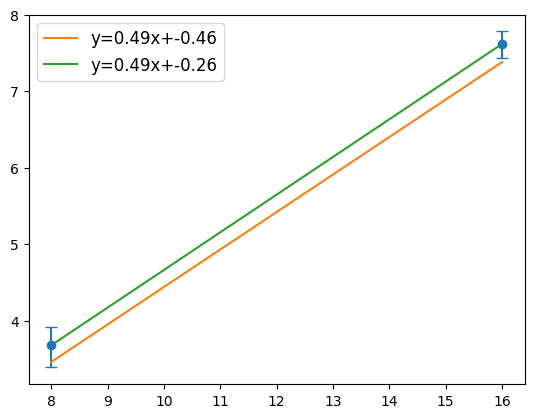

--- 15.96591329574585 seconds ---


In [6]:
start_time = time.time()

seed(1000)
point2 = 16
point1 = 8
numbsimul = 1280
Size = np.linspace(point1,point2, 2)

A = np.zeros((2,numbsimul -1))

# simulations of random walks
for k in Size:
    n=int(pow(2,k))
    if k==point1:
        l=0
    if k==point2:
        l=1

    for j in range(1,numbsimul):
    
        x = 0
    
        for i in range(1,n):
            
            if random()> 0.5:
                x=x+1
            else:
                x=x-1
        A[l][j-1]=x

# calculating the linear regression of log map
absA = np.abs(A)
sortedAbs = np.sort(absA)
stdA = absA.std(1)
meanA = absA.mean(1)
median = np.quantile(absA, 0.5 , 1)

logmean = np.log(meanA)/np.log(2)
logmedian = np.log(median)/np.log(2)
p1 = np.polyfit(Size, logmedian, 1)
p2 = np.polyfit(Size, logmean, 1)

# calculating the interval of confidence
alpha = 0.001 # confidence level

lowerboundindex = math.floor(0.5* numbsimul - math.sqrt(0.25*numbsimul)*norm.isf(alpha))
upperboundindex = math.floor(0.5* numbsimul + math.sqrt(0.25*numbsimul)*norm.isf(alpha))
lowerboundindex = [lowerboundindex for i in range(2)]
upperboundindex = [upperboundindex for i in range(2)]
lowerboundheight = sortedAbs[np.arange(2),lowerboundindex]
upperboundheight = sortedAbs[np.arange(2),upperboundindex]
loglower = np.log(lowerboundheight)/np.log(2)
logupper = np.log(upperboundheight)/np.log(2)

errorbar = [np.abs(loglower-logmedian), np.abs(logupper-logmedian)]

# printing everything
print(" ---- diffusion constant is approximally %s using median ----" % p1[0])
print(" ---- diffusion constant is approximally %s using mean ----" % p2[0])
# print("---- error = %s ----" % (errorbar))
plt.errorbar(Size,logmean,yerr=errorbar, linestyle = 'None',capsize=4, marker = 'o')
plt.plot(Size, p1[1]+p1[0]*Size, label='y={:.2f}x+{:.2f}'.format(p1[0],p1[1]))
plt.plot(Size, p2[1]+p2[0]*Size, label='y={:.2f}x+{:.2f}'.format(p2[0],p2[1]))
plt.legend(fontsize=12)
plt.show()
print("--- %s seconds ---" % (time.time() - start_time))

 ---- diffusion constant is approximally 0.4846597446300858 using median ----
 ---- diffusion constant is approximally 0.49580781412762015 using mean ----


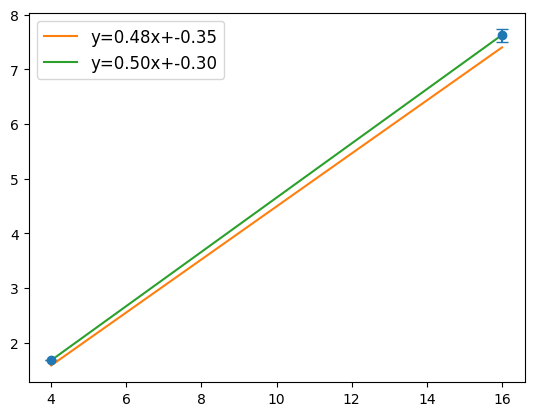

--- 21.786246061325073 seconds ---


In [7]:
start_time = time.time()

seed(8)
point2 = 16
point1 = 4
numbsimul = 1800
Size = np.linspace(point1,point2, 2)

A = np.zeros((2,numbsimul -1))

# simulations of random walks
for k in Size:
    n=int(pow(2,k))
    if k==point1:
        l=0
    if k==point2:
        l=1

    for j in range(1,numbsimul):
    
        x = 0
    
        for i in range(1,n):
            
            if random()> 0.5:
                x=x+1
            else:
                x=x-1
        A[l][j-1]=x

# calculating the linear regression of log map
absA = np.abs(A)
sortedAbs = np.sort(absA)
stdA = absA.std(1)
meanA = absA.mean(1)
median = np.quantile(absA, 0.5 , 1)

logmean = np.log(meanA)/np.log(2)
logmedian = np.log(median)/np.log(2)
p1 = np.polyfit(Size, logmedian, 1)
p2 = np.polyfit(Size, logmean, 1)

# calculating the interval of confidence
alpha = 0.001 # confidence level

lowerboundindex = math.floor(0.5* numbsimul - math.sqrt(0.25*numbsimul)*norm.isf(alpha))
upperboundindex = math.floor(0.5* numbsimul + math.sqrt(0.25*numbsimul)*norm.isf(alpha))
lowerboundindex = [lowerboundindex for i in range(2)]
upperboundindex = [upperboundindex for i in range(2)]
lowerboundheight = sortedAbs[np.arange(2),lowerboundindex]
upperboundheight = sortedAbs[np.arange(2),upperboundindex]
loglower = np.log(lowerboundheight)/np.log(2)
logupper = np.log(upperboundheight)/np.log(2)

errorbar = [np.abs(loglower-logmedian), np.abs(logupper-logmedian)]

# printing everything
print(" ---- diffusion constant is approximally %s using median ----" % p1[0])
print(" ---- diffusion constant is approximally %s using mean ----" % p2[0])
# print("---- error = %s ----" % (errorbar))
plt.errorbar(Size,logmean,yerr=errorbar, linestyle = 'None',capsize=4, marker = 'o')
plt.plot(Size, p1[1]+p1[0]*Size, label='y={:.2f}x+{:.2f}'.format(p1[0],p1[1]))
plt.plot(Size, p2[1]+p2[0]*Size, label='y={:.2f}x+{:.2f}'.format(p2[0],p2[1]))
plt.legend(fontsize=12)
plt.show()
print("--- %s seconds ---" % (time.time() - start_time))